In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as pl

In [33]:
col = ['TotalSteps','TotalDistance','TrackerDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']
#columns = ['IMA', 'WeightBearing', 'Sedentary', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'TotalSteps']
df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\ayanca\AI\IJMI_AI_Med\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\required_data\dailyActivity_merged.csv', sep=',')
df = df[col]
print (df.head())

   TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0       13162           8.50             8.50                       0.0   
1       10735           6.97             6.97                       0.0   
2       10460           6.74             6.74                       0.0   
3        9762           6.28             6.28                       0.0   
4       12669           8.16             8.16                       0.0   

   VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                1.88                      0.55                 6.06   
1                1.57                      0.69                 4.71   
2                2.44                      0.40                 3.91   
3                2.14                      1.26                 2.83   
4                2.71                      0.41                 5.04   

   SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                      0.0                 25 

In [34]:
import matplotlib.pyplot as plt

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalSteps,1.000000,0.985954,0.984296,0.160200,0.737632,0.519239,0.724939,0.072573,0.676558,0.359186,0.604097,-0.311026,0.590160
TotalDistance,0.985954,1.000000,0.998001,0.171235,0.793263,0.486334,0.694288,0.079544,0.691143,0.338098,0.555373,-0.277164,0.635304
TrackerDistance,0.984296,0.998001,1.000000,0.127965,0.792199,0.486318,0.691512,0.073306,0.690019,0.338816,0.548834,-0.277050,0.634999
LoggedActivitiesDistance,0.160200,0.171235,0.127965,1.000000,0.146589,0.066609,0.122449,0.127465,0.219398,0.148998,0.110017,-0.065924,0.177437
VeryActiveDistance,0.737632,0.793263,0.792199,0.146589,1.000000,0.209389,0.197175,0.044260,0.834868,0.165806,0.109338,-0.070488,0.472437
ModeratelyActiveDistance,0.519239,0.486334,0.486318,0.066609,0.209389,1.000000,0.270046,0.008515,0.241330,0.697993,0.208673,-0.225872,0.247016
LightActiveDistance,0.724939,0.694288,0.691512,0.122449,0.197175,0.270046,1.000000,0.085621,0.198120,0.162119,0.876294,-0.386070,0.464583
SedentaryActiveDistance,0.072573,0.079544,0.073306,0.127465,0.044260,0.008515,0.085621,1.000000,0.014830,-0.012623,0.116533,0.038197,0.062904
VeryActiveMinutes,0.676558,0.691143,0.690019,0.219398,0.834868,0.241330,0.198120,0.014830,1.000000,0.234173,0.104771,-0.167844,0.582028
FairlyActiveMinutes,0.359186,0.338098,0.338816,0.148998,0.165806,0.697993,0.162119,-0.012623,0.234173,1.000000,0.119176,-0.185045,0.307482


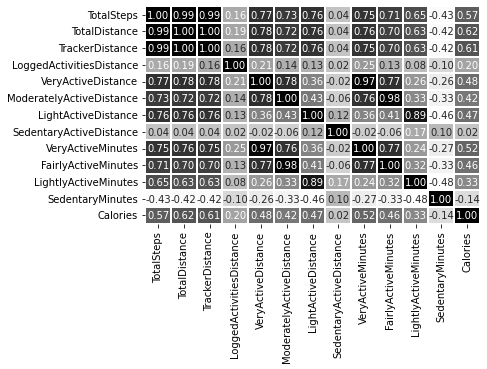

In [35]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Greys'), cbar=False, linewidths=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result2.png', bbox_inches='tight', pad_inches=1.0, dpi=300)

In [36]:
columns = ['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'TotalSteps']
#df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\ayanca\AI\IJMI_AI_Med\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16\required_data\dailyActivity_merged.csv', sep=',')
df = df[columns]
print (df.head())

   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  \
0               728                   328                   13   
1               776                   217                   19   
2              1218                   181                   11   
3               726                   209                   34   
4               773                   221                   10   

   VeryActiveMinutes  TotalSteps  
0                 25       13162  
1                 21       10735  
2                 30       10460  
3                 29        9762  
4                 36       12669  


In [28]:
#columns = ['Sedentary', 'LPA', 'MPA', 'VPA', 'Steps']
#df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\ayanca\activity_data\Mox2-5\MOX2_5_data.csv', sep=',')
#df = df[columns]

In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalSteps
SedentaryMinutes,1.000000,-0.419332,-0.185045,-0.167844,-0.311026
LightlyActiveMinutes,-0.419332,1.000000,0.119176,0.104771,0.604097
FairlyActiveMinutes,-0.185045,0.119176,1.000000,0.234173,0.359186
VeryActiveMinutes,-0.167844,0.104771,0.234173,1.000000,0.676558
TotalSteps,-0.311026,0.604097,0.359186,0.676558,1.000000


In [38]:
def calculate_lebel(df):
    if ((df['TotalSteps'] < 5000) and ((df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 < 90) and (df['LightlyActiveMinutes'] >=0)): #sedentary
        return 0
    elif ((df['TotalSteps'] >= 5000) and ((df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 >= 90) and (df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 < 210) or (df['TotalSteps'] >= 5000 and df['TotalSteps'] <= 7499): #LPA
        return 1
    elif ((df['TotalSteps'] >= 5000) and ((df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 >= 210) and (df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 < 300) or (df['TotalSteps'] >= 7500 and df['TotalSteps'] <= 9999): #MPA
        return 2
    elif ((df['TotalSteps'] >= 5000) and ((df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 >= 300) and (df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 < 360) or (df['TotalSteps'] >= 10000 and df['TotalSteps'] <= 12499): #MPA
        return 3
    elif ((df['TotalSteps'] >= 5000) and (df['VeryActiveMinutes']*2 + df['FairlyActiveMinutes'])*7 >= 360) or (df['TotalSteps'] >= 12500): #VPA
        return 4
    elif (df['TotalSteps'] < 5000):
        return 0

df['Activity Level'] = df.apply(calculate_lebel, axis=1)

In [31]:
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalSteps,active
0,728,328,13,25,13162,4
1,776,217,19,21,10735,3
2,1218,181,11,30,10460,3
3,726,209,34,29,9762,2
4,773,221,10,36,12669,4
...,...,...,...,...,...,...
1392,982,359,29,70,23014,4
1393,1052,289,9,90,16470,4
1394,1055,211,46,128,28497,4
1395,1190,225,7,18,10622,3


In [12]:
df['active'].isnull().values.any()

False

In [13]:
df.shape

(1397, 6)

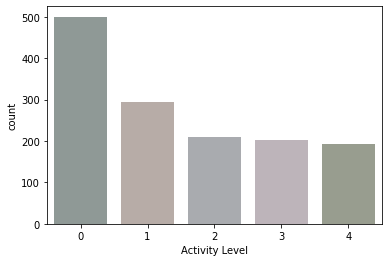

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='Activity Level', data = df, palette = "Set2", saturation = 0.1)
 
plt.savefig('result_2.png', bbox_inches='tight', pad_inches=1.0, dpi=300)

In [14]:
df.to_csv('zendata_processed_33.csv')

In [10]:
array = df.values
X = array[:,0:5]
Y = array[:,5]

In [11]:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,Y)

set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:5])


[ 485622.78  434239.95  162037.25  177750.78 1124239.68]

Featured data:
 [[111078   4138   1466    814   9876]
 [112274   4640   1976    704  10074]
 [134114   4104   2560    114  11014]
 [ 80186   3288   2814    176   7656]
 [ 79104   5564   1448    176  12114]]


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
fit = pca.fit(X)
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.65e-01 2.97e-02 4.06e-03 8.88e-04 3.97e-04]
[[ 9.98e-01  1.85e-02  3.45e-03  9.04e-03  6.16e-02]
 [-6.42e-02  4.12e-01  1.31e-01  1.19e-01  8.91e-01]
 [-6.89e-03 -8.55e-01  3.26e-01  2.52e-01  3.14e-01]
 [-2.31e-04  1.52e-01 -1.76e-01  9.57e-01 -1.73e-01]
 [-7.79e-03 -2.73e-01 -9.20e-01 -7.70e-02  2.71e-01]]


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.07 0.17 0.16 0.08 0.52]
